In [1]:
import pandas as pd
data = pd.read_csv("identificacion desuelosARASI.csv")
data.head()

,Componente ambiental,Matriz,Nombre del punto,Este,Norte,Zona,Datum,Altitud,Tipo de muestra,Parámetros que incumplen la norma,Norma de comparación,Descripcion de ubicación,Fecha,Aluminio total,Antinomio total,Arsénico total,Bario total,Berilio total,Bismuto total,Boro total,Cadmio total,Calcio total,Cerio total,Cobalto total,Cobre total,Cromo total,Estaño total,Estroncio total,Fosforo total,Hierro total,Litio total,Magnesio total,Manganeso total,Mercurio total,Molibdeno total,Níquel total,Plata total,Plomo total,Potasio total,Selenio total,Sodio disuelto,Talio total,Titanio total,Torio total,Uranio total,Vanadio total,Wolframio total,Zinc total
0,Suelo,Identificación de suelos,CSA-10a,300053,8313726,19 Sur,WGS84,4558,Simple,Ninguno,ECA suelo 2013,"Ubicada al suroeste del PAD Andrés, a ambos má...",8/02/2017,19685,"0,0067","4,9",317,"1,82","0,1892","3,2","0,0893",4773,"75,42",22,48,26,"0,46",100,1113,23764,"9,93",3084,1010,"0,08","0,632","18,5","0,276","13,1",1784,"3,65",731,"0,591",675,"9,236","1,983",52,"< 0,0017",117
1,Suelo,Identificación de suelos,CSA-10b,300014,8313687,19 Sur,WGS84,4525,Simple,Ninguno,ECA suelo 2013,"Ubicada al suroeste del PAD Andrés, a ambos má...",8/02/2017,11960,"< 0,0017","4,6",175,"1,8","0,1379","3,59","0,0675",6685,"69,66","12,8",32,21,"0,39",139,1672,25355,"5,85",3352,643,"< 0,03","0,725","16,3","< 0,006","7,67",1935,"3,45",375,"0,4714",265,"6,848","1,302",50,"< 0,0017","54,4"
2,Suelo,Identificación de suelos,CSA-10c,299982,8313619,19 Sur,WGS84,4498,Simple,Ninguno,ECA suelo 2013,"Ubicada al suroeste del PAD Andrés, a ambos má...",8/02/2017,16045,"< 0,0017","3,3",111,"1,28","0,127","0,282","0,0596",13833,"65,59","10,3",28,23,"0,65",108,1019,20127,"4,24",7042,618,"< 0,03","0,399",14,"< 0,006","10,5",1289,"4,37",583,"0,0651",200,"6,429","0,9039",53,"< 0,0017","57,7"
3,Suelo,Identificación de suelos,CSA-10d,299803,8313601,19 Sur,WGS84,4453,Simple,Ninguno,ECA suelo 2013,"Ubicada al suroeste del PAD Andrés, a ambos má...",8/02/2017,15293,"0,0051",4,246,"1,49","0,1302","2,59","0,0613",3662,"61,69","9,84",26,20,"0,35","89,3",1034,23156,"6,72",2831,688,"< 0,03","0,615","14,6","< 0,006","8,81",2402,"2,59",276,"0,3763",499,"7,538","1,65",42,"< 0,0017","41,9"
4,Suelo,Identificación de suelos,CSA-11a,300107,8312020,19 Sur,WGS84,4458,Simple,As,ECA suelo 2013,Ubicada al sur del tajo Valle y del botadero N...,8/02/2017,11477,"0,236",57,291,"1,22","0,4346","3,43","0,1865",3137,"48,44","7,98",31,13,"0,35","78,9",1125,22694,"6,59",2578,448,"< 0,03","2,07","9,6","< 0,006","35,1",1461,"3,22",262,"0,495",154,"3,175","1,658",36,"< 0,0017","63,8"


In [0]:
data2 = data[(data["Descripción de figura"] == "Sulfatada cálcica") & (data["Altitud"] < 4800)]

In [8]:
data2 = data[(data["Parámetros que incumplen la norma"]== "Ninguno") & (data["Uranio total"]>"2")]
data2.head()


,Componente ambiental,Matriz,Nombre del punto,Este,Norte,Zona,Datum,Altitud,Tipo de muestra,Parámetros que incumplen la norma,Norma de comparación,Descripcion de ubicación,Fecha,Aluminio total,Antinomio total,Arsénico total,Bario total,Berilio total,Bismuto total,Boro total,Cadmio total,Calcio total,Cerio total,Cobalto total,Cobre total,Cromo total,Estaño total,Estroncio total,Fosforo total,Hierro total,Litio total,Magnesio total,Manganeso total,Mercurio total,Molibdeno total,Níquel total,Plata total,Plomo total,Potasio total,Selenio total,Sodio disuelto,Talio total,Titanio total,Torio total,Uranio total,Vanadio total,Wolframio total,Zinc total
18,Suelo,Identificación de suelos,CSA-13b,300859,8311491,19 Sur,WGS84,4475,Simple,Ninguno,ECA suelo 2013,Ubicada entre el polvorín y la zona de desecho...,8/02/2017,20058,"0,2557",40,442,"2,46","0,629","3,45","0,1561",3334,"94,81","16,5",59,15,"0,48",104,2493,36714,"8,83",3241,620,"< 0,03","1,79","14,5","< 0,006","25,4",1982,"3,68",456,"1,086",401,"5,854","2,458",47,"< 0,0017","85,5"
63,Suelo,Identificación de suelos,CSA-8c,300723,8311640,19 Sur,WGS84,4464,Simple,Ninguno,ECA suelo 2013,Ubicada al sur del tajo valle y al suroeste de...,6/02/2017,16858,"0,2063",42,174,"1,26","0,2345","6,01","0,7869",31875,"48,52","21,3",88,16,"0,41",55,1379,29525,10,2777,836,"0,03","1,16","25,3","< 0,006","12,4",1375,"2,13",197,"0,6806",286,"3,086","2,284",42,"0,0109",141


In [0]:
!pip install fiona
!pip install geopandas
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona

     |████████████████████████████████| 17.9MB 5.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch
     |████████████████████████████████| 901kB 5.0MB/s 
     |████████████████████████████████| 11.2MB 15.5MB/s 


In [0]:
geometry = [Point(xy) for xy in zip(data2.Este, data2.Norte)]

In [0]:
crs = {"init":"epsg:32719"}

In [0]:
geo_df = GeoDataFrame(data2, geometry = geometry, crs=crs)

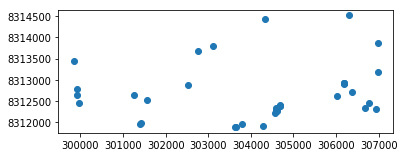

In [0]:
geo_df.plot()

In [0]:
geojson = geo_df.to_crs(epsg="4326").to_json()

In [0]:
import folium
mapa = folium.Map([-15.24,-70.85], zoom_start=12, tiles="Stamen Terrain") #condiciones del mapa
puntos = folium.features.GeoJson(geojson) #importamos los puntos(que estan en formato geojson)
mapa.add_children(puntos) #añadimos los puntos al mapa creado
mapa

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  after removing the cwd from sys.path.
